<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 02: Regression (Linear and Logistic)**

This Colab notebook covers:
- Linear Regression (Concept, Implementation, Evaluation)
- Logistic Regression (Concept, Implementation, Evaluation)
- Bias-Variance Tradeoff
- Building and Evaluating Regression Models using scikit-learn

# ---- LINEAR REGRESSION ---- #

## Concept of Linear Regression

Linear regression is a fundamental algorithm in machine learning used for predicting continuous outcomes.
It establishes a relationship between independent variable(s) X and dependent variable Y using a linear function:

    Y = β0 + β1X + ε

Where:
- Y is the dependent variable (target)
- X is the independent variable (predictor)
- β0 is the intercept: The value of the dependent variable when all independent variables are zero. It represents the starting point of the regression line.
- β1 is the coefficient (slope): The amount by which the dependent variable changes for a one-unit increase in the corresponding independent variable, assuming all other variables remain constant.
- ε is the error term

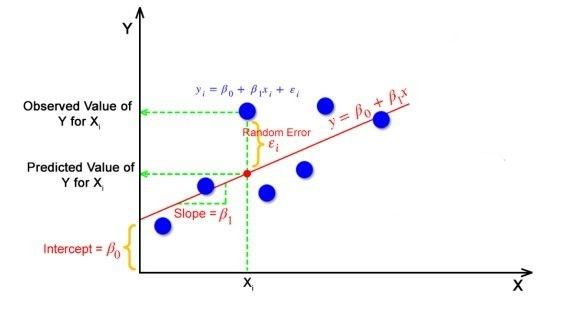

Ref: https://medium.com/@nandiniverma78988/exploring-linear-regression-and-creating-a-graphical-representation-in-python-c73376c619ed

### Assumptions of Linear Regression:
Linear regression relies on the following key assumptions:
1. **Linearity**: The relationship between independent and dependent variables must be linear.
2. **Independence**: Observations must be independent of each other.
3. **Homoscedasticity**: This means that the spread of the residuals (the differences between the predicted and actual values) should remain roughly the same across all values of the independent variable (X). In other words, the size of the prediction errors shouldn't systematically get larger or smaller as X changes.
4. **Normality**: Residuals should be normally distributed.
5. **No Multicollinearity**: Independent variables should not be highly correlated (for multiple linear regression).

### Ordinary Least Squares (OLS) Method:

OLS is a technique used in linear regression to find the best-fitting line through a set of data points. It works by minimizing the sum of the squared differences between the actual values and the predicted values. These differences are called residuals.

Why square the differences?
Squaring the residuals ensures that larger errors are given more weight and that positive and negative errors don’t cancel each other out.

Simple Example:
Imagine you're trying to draw a line that best predicts house prices based on square footage. OLS helps find the line that keeps the prediction errors (residuals) as small as possible across all data points.

The objective of linear regression is to find the best-fitting line by minimizing the sum of squared residuals. The formula for estimating coefficients using OLS is:

    β = (XᵀX)⁻¹XᵀY

Where:
- X is the matrix of input features
- Y is the target vector
- β represents the estimated coefficients

OLS finds the optimal values of β that minimize the cost function:

    Cost = Σ (Yᵢ - (β0 + β1Xᵢ))²


### Interpretation of Coefficients:
- **Intercept (β0):** The predicted value of Y when X = 0.
- **Slope (β1):** Represents the change in Y for a one-unit increase in X.

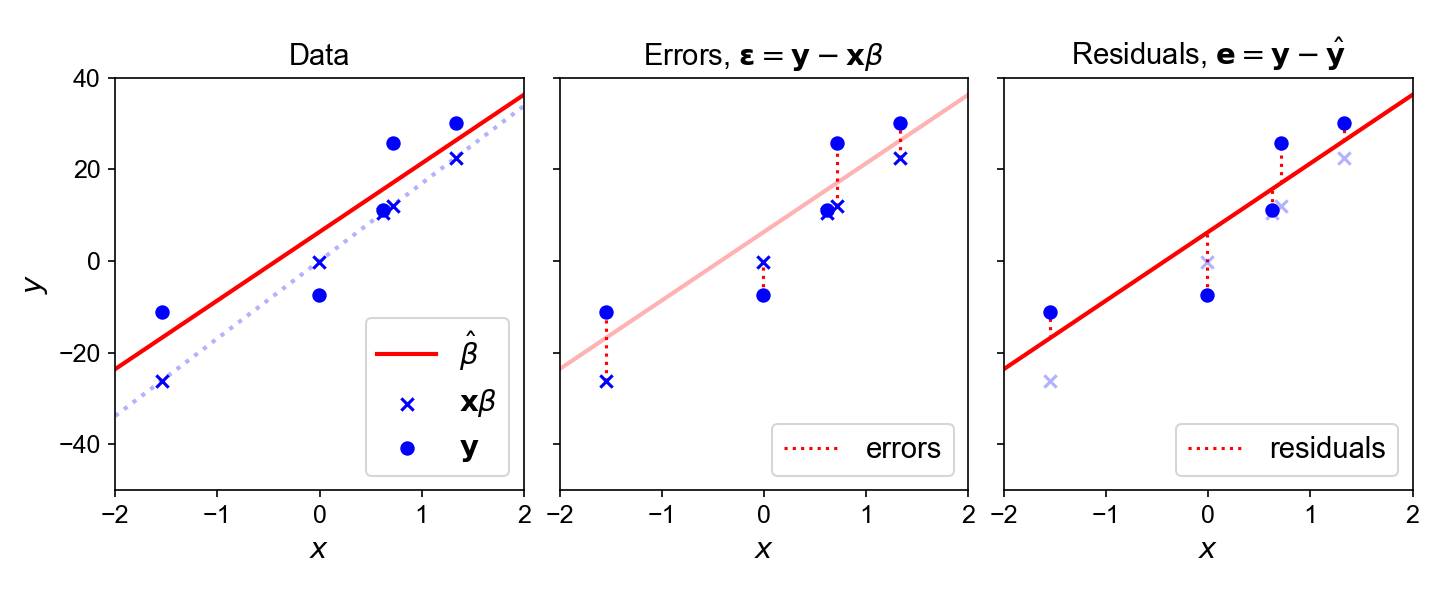

Ref: https://gregorygundersen.com/blog/2020/01/04/ols/

In this figure, β̂ (B-hat) represents the estimated regression coefficients obtained using the Ordinary Least Squares (OLS) method. β̂ (B-hat) is the result of applying the OLS formula.

These coefficients define the red line in the first plot, which is the best-fit line through the data.

### In the leftmost plot (labeled "Data"):

- The red line represents the model's predictions using the estimated coefficients β̂.  
- The blue dots represent the observed values (y), and the blue crosses show the linear transformation Xβ before fitting.

### In the middle plot ("Errors"):

- Errors (ε) represent the difference between the true observed values (y) and the true model predictions (Xβ).  
- Formula:  
  ε = y - Xβ  
- These are the differences when using the true (unknown) population parameters.

### In the rightmost plot ("Residuals"):

- Residuals (e) are the differences between the observed values (y) and the predicted values (ŷ) based on the estimated coefficients β̂.  
- Formula:  
  e = y - ŷ  
- Residuals are what OLS minimizes by choosing β̂.


### Advantages of Linear Regression:
- Simple and easy to interpret.
- Efficient for small datasets.
- Works well when assumptions hold.

### Limitations of Linear Regression:
- Sensitive to outliers.
- Assumes a linear relationship between X and Y.
- Cannot handle complex relationships without transformation or feature engineering.

Intercept (β0): 4.142913319458566
Slope (β1): 2.7993236574802762


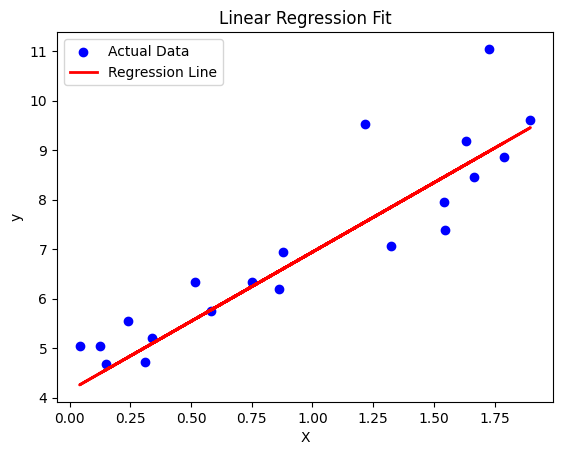

Mean Squared Error: 0.6536995137170021
R-squared Score: 0.8072059636181392


In [ ]:
# Implementing Linear Regression with scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

## Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementation: Training a Linear Regression Model
"""
We use **scikit-learn's LinearRegression** class to train a linear regression model. The model learns the parameters β0 and β1 by minimizing the residual sum of squares.
"""

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model Parameters
print(f"Intercept (β0): {lin_reg.intercept_[0]}") #The baseline prediction when the input feature 𝑥=0
print(f"Slope (β1): {lin_reg.coef_[0][0]}") #The rate of change of 𝑦 with respect to 𝑥

## Predictions
y_pred = lin_reg.predict(X_test)

## Visualization of the Regression Line
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

## Evaluation Metrics
"""
To evaluate our regression model, we use the following metrics:
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.
- **R-squared Score (R²):** Represents the proportion of variance explained by the model (1 means perfect fit).
"""

# Compute Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

## Multiple Linear Regression


Multiple Linear Regression (MLR) extends simple linear regression by incorporating multiple independent variables (predictors). The general form of the equation is:

    Y = β0 + β1X1 + β2X2 + ... + βnXn + ε

Where:
- Y is the dependent variable (target)
- X1, X2, ..., Xn are independent variables (predictors)
- β0 is the intercept
- β1, β2, ..., βn are the coefficients corresponding to each predictor
- ε is the error term

### Assumptions of Multiple Linear Regression
For MLR to provide reliable predictions, the following assumptions must hold:
1. **Linearity**: The relationship between independent and dependent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of residuals remains constant across different levels of predictors.
4. **Normality**: Residuals should be normally distributed.
5. **No Multicollinearity**: Independent variables should not be highly correlated with each other.


Intercept (β0): 4.793257488973518
Coefficients (β1, β2): [1.87501104 3.26239125]
Mean Squared Error: 0.6664320988651891
R-squared Score: 0.9372569685960334


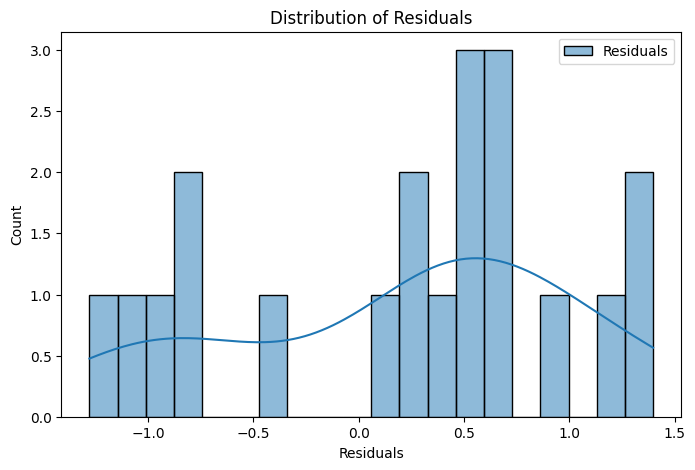

In [ ]:
# Implementing Multiple Linear Regression with scikit-learn

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 5 + 2 * X1 + 3 * X2 + np.random.randn(100, 1)  # y = 5 + 2X1 + 3X2 + noise

# Combine independent variables into a matrix
X = np.hstack((X1, X2))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Model Parameters
print(f"Intercept (β0): {mlr.intercept_[0]}")
print(f"Coefficients (β1, β2): {mlr.coef_[0]}")

# Predictions
y_pred = mlr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualizing Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, label="Residuals") #kde stands for Kernel Density Estimate
plt.legend()
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

### Interpretation of Coefficients
- **Intercept (β0):** Expected value of Y when all predictors are zero.
- **β1, β2, ..., βn:** Change in Y for a one-unit increase in the corresponding predictor, keeping others constant.

### Advantages of Multiple Linear Regression
- Can model relationships between multiple independent variables and a dependent variable.
- Provides insights into how different features contribute to the target variable.

### Limitations
- Sensitive to multicollinearity.
- Assumptions must hold for reliable predictions.
- Performance decreases if irrelevant features are included.


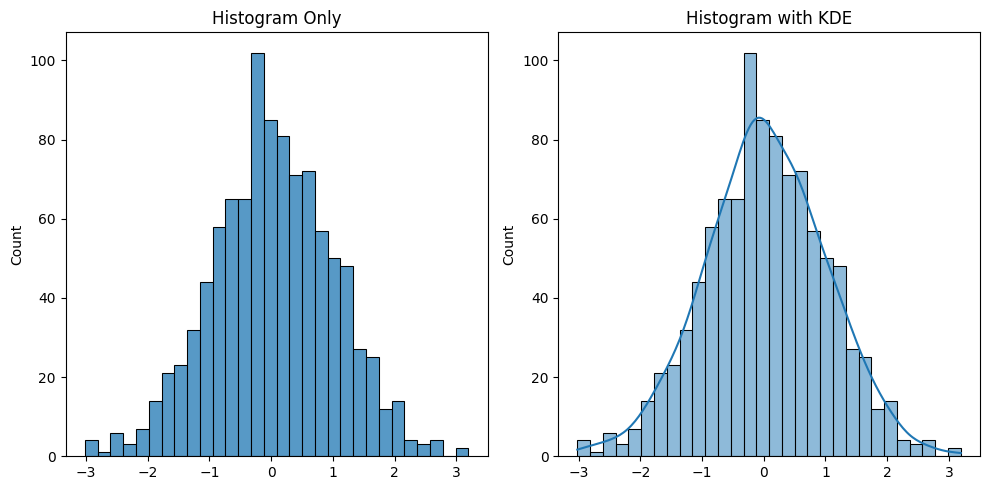

In [ ]:
#When Should You Use KDE?
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram with and without KDE
plt.figure(figsize=(10, 5))

# Without KDE (Avoid KDE if you have few data points or highly discrete data, as it might give a misleading impression of continuity)
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=False)
plt.title("Histogram Only")

# With KDE (Use KDE when you want a clearer understanding of the data's distribution shape)
plt.subplot(1, 2, 2)
sns.histplot(data, bins=30, kde=True)
plt.title("Histogram with KDE")

plt.tight_layout()
plt.show()


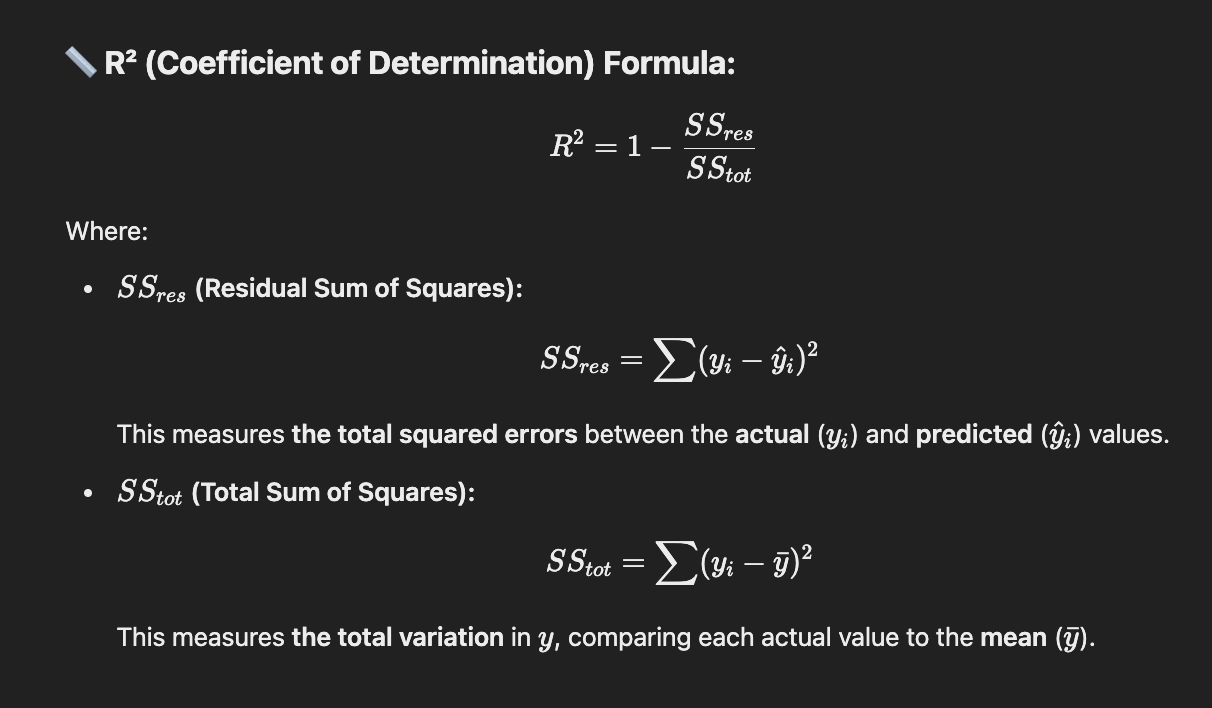

Intuition Behind R²

- 𝑅2=1 → Perfect model (all predictions are accurate).
- 𝑅2=0 → Model is no better than the mean.
- 𝑅2<0 → Model performs worse than just predicting the mean.

In [16]:
#Python Code to Calculate R²
import numpy as np

# Example actual and predicted values
y_actual = np.array([3, 6, 7, 10, 15])
y_pred = np.array([2.8, 6.5, 6.7, 9.8, 14.5])

# Compute SS_res and SS_tot
ss_res = np.sum((y_actual - y_pred) ** 2)
ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)

# Compute R-squared
r2 = 1 - (ss_res / ss_tot)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9919


When to Use R²?
- For Linear & Polynomial Regression models.
- To check model performance and fit quality.

❌ Why R² (R-squared) Is Not Used for Classification (e.g., Logistic Regression)
R² is specifically designed for regression problems, not classification. Here’s why:

1. R² Measures Variance Explained (Not Class Probabilities)
R² is based on the difference between actual and predicted numerical values.
In classification (like Logistic Regression), predictions are categorical (e.g., 0 or 1), not continuous.

2. Logistic Regression Outputs Probabilities, Not Continuous Values
Logistic Regression predicts probabilities between 0 and 1, then assigns classes based on a threshold (e.g., 0.5).
Since the actual target values are discrete (0 or 1), R² cannot measure the explained variance properly.

❌ Mean Squared Error (MSE) Is Only for Regression, Not Classification
Yes! MSE is only used for regression models where the target variable is continuous. It does not work for classification problems because classification deals with categorical outputs (e.g., 0 or 1, labels like "spam" or "not spam").


Why MSE Doesn't Work for Classification

1- In classification:
- Predicted values are categorical (e.g., 0 or 1 in binary classification).
- MSE assumes a continuous difference between actual and predicted values, but classification predictions are discrete (class labels).

2- If you tried using MSE for classification, you might get misleading results because:

- It doesn't handle probability outputs well (e.g., logistic regression outputs probabilities between 0 and 1).
- Errors are not meaningful in classification (e.g., is predicting "dog" instead of "cat" a difference of 1 unit? No!).


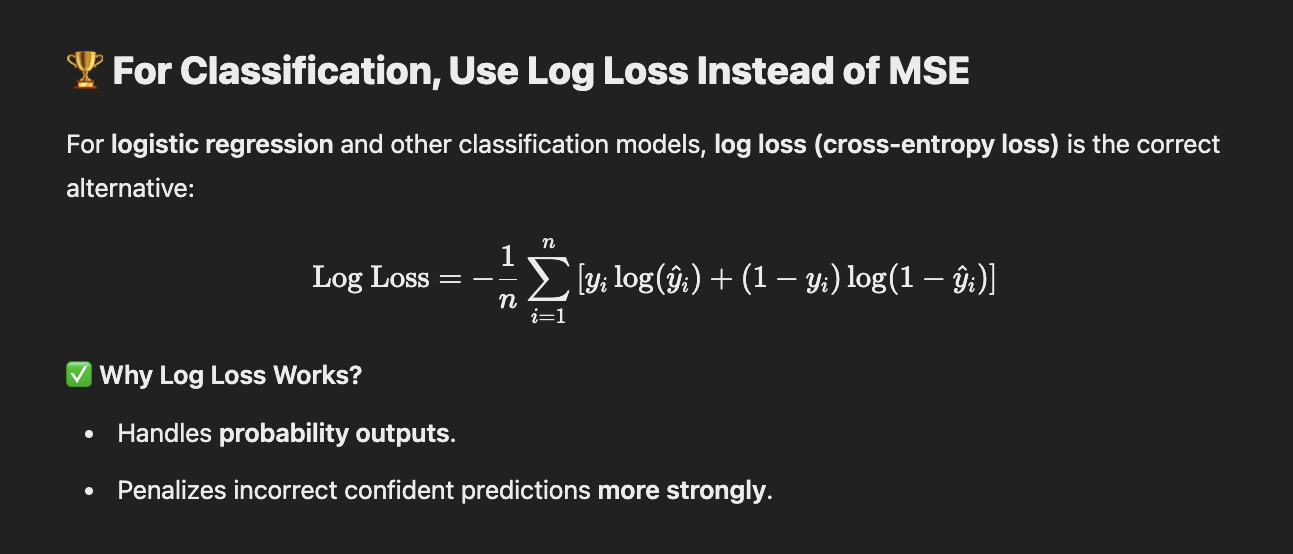

In [17]:
#Python Code Example: MSE for Regression vs Log Loss for Classification
from sklearn.metrics import mean_squared_error, log_loss

# Example: Regression (MSE)
y_true_reg = [3.0, 5.0, 7.0, 9.0]
y_pred_reg = [2.8, 5.1, 6.9, 9.2]
mse = mean_squared_error(y_true_reg, y_pred_reg)
print(f"Mean Squared Error (MSE) for Regression: {mse:.4f}")

# Example: Classification (Log Loss)
y_true_cls = [1, 0, 1, 1, 0]  # Actual class labels
y_pred_probs = [0.9, 0.2, 0.8, 0.7, 0.1]  # Predicted probabilities
logloss = log_loss(y_true_cls, y_pred_probs)
print(f"Log Loss for Classification: {logloss:.4f}")


Mean Squared Error (MSE) for Regression: 0.0250
Log Loss for Classification: 0.2027


###The UCI Machine Learning Repository (https://archive.ics.uci.edu/)

A well-known and widely used online resource that provides access to a vast collection of real-world datasets for machine learning and data science research. Hosted by the University of California, Irvine, this repository serves as a valuable resource for students, researchers, and professionals seeking datasets for exploratory data analysis, model training, and validation.

The repository covers a diverse range of domains, including healthcare, finance, real estate, social sciences, and more. Each dataset is typically accompanied by a detailed description, feature explanations, and relevant references, making it easier for users to understand and apply the data effectively. The datasets are commonly used in academic research, machine learning competitions, and educational projects.

For this analysis, I sourced the Real Estate Valuation Data Set from the UCI repository, which contains information on house prices based on factors such as transaction date, house age, proximity to MRT stations, number of convenience stores, and geographical coordinates. This dataset allows us to build a Multiple Linear Regression model to predict house prices based on these features.

### **Dataset Overview**
- The dataset consists of **414 real estate transactions**, with **6 key features** influencing house prices:
  - **Transaction Date**: The date of sale (ranging from 2012.667 to 2013.583).
  - **House Age**: The age of the house in years (0 to 43.8 years).
  - **Distance to MRT Station**: Proximity to public transportation (minimum 23m, maximum 6488m).
  - **Number of Convenience Stores Nearby**: Represents the number of stores within walking distance (0 to 10).
  - **Latitude & Longitude**: The geographical location of the property.
  - **House Price (Target Variable)**: Measured in 10,000 New Taiwan Dollars per ping (unit area).

- **Missing Values**: No missing values were found in the dataset, which is good for modeling.

- **Summary Statistics**:
  - The **average house price** is **37.98** (per unit area).
  - Houses are on average **17.71 years old**.
  - The **average distance to an MRT station** is **1083 meters** (but varies greatly up to **6.4km**).
  - The **number of convenience stores** nearby varies from **0 to 10**.

First 5 rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3

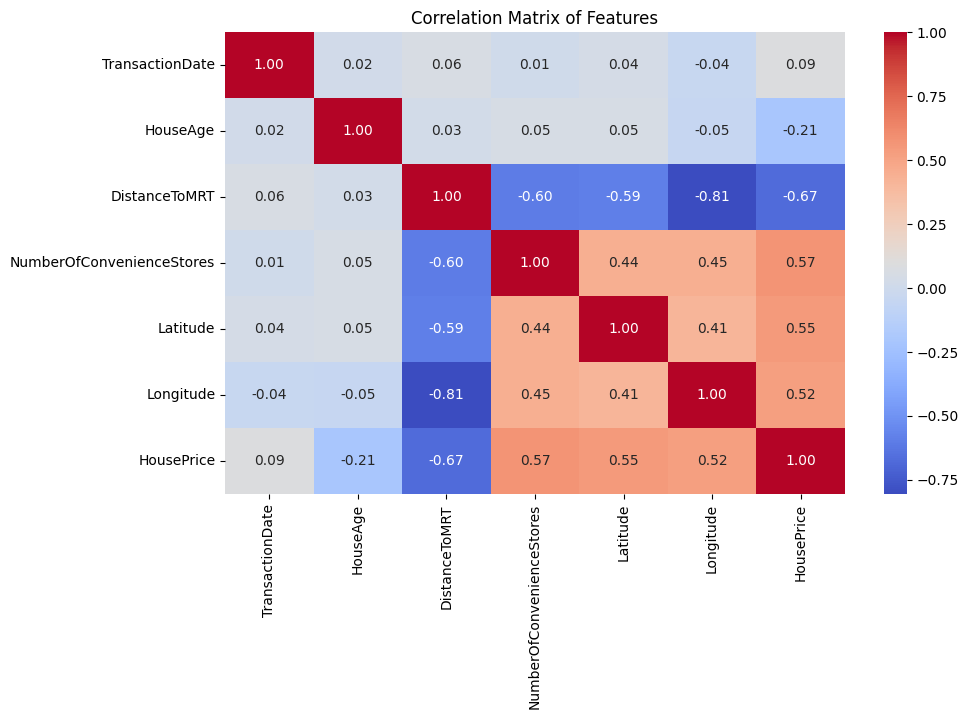

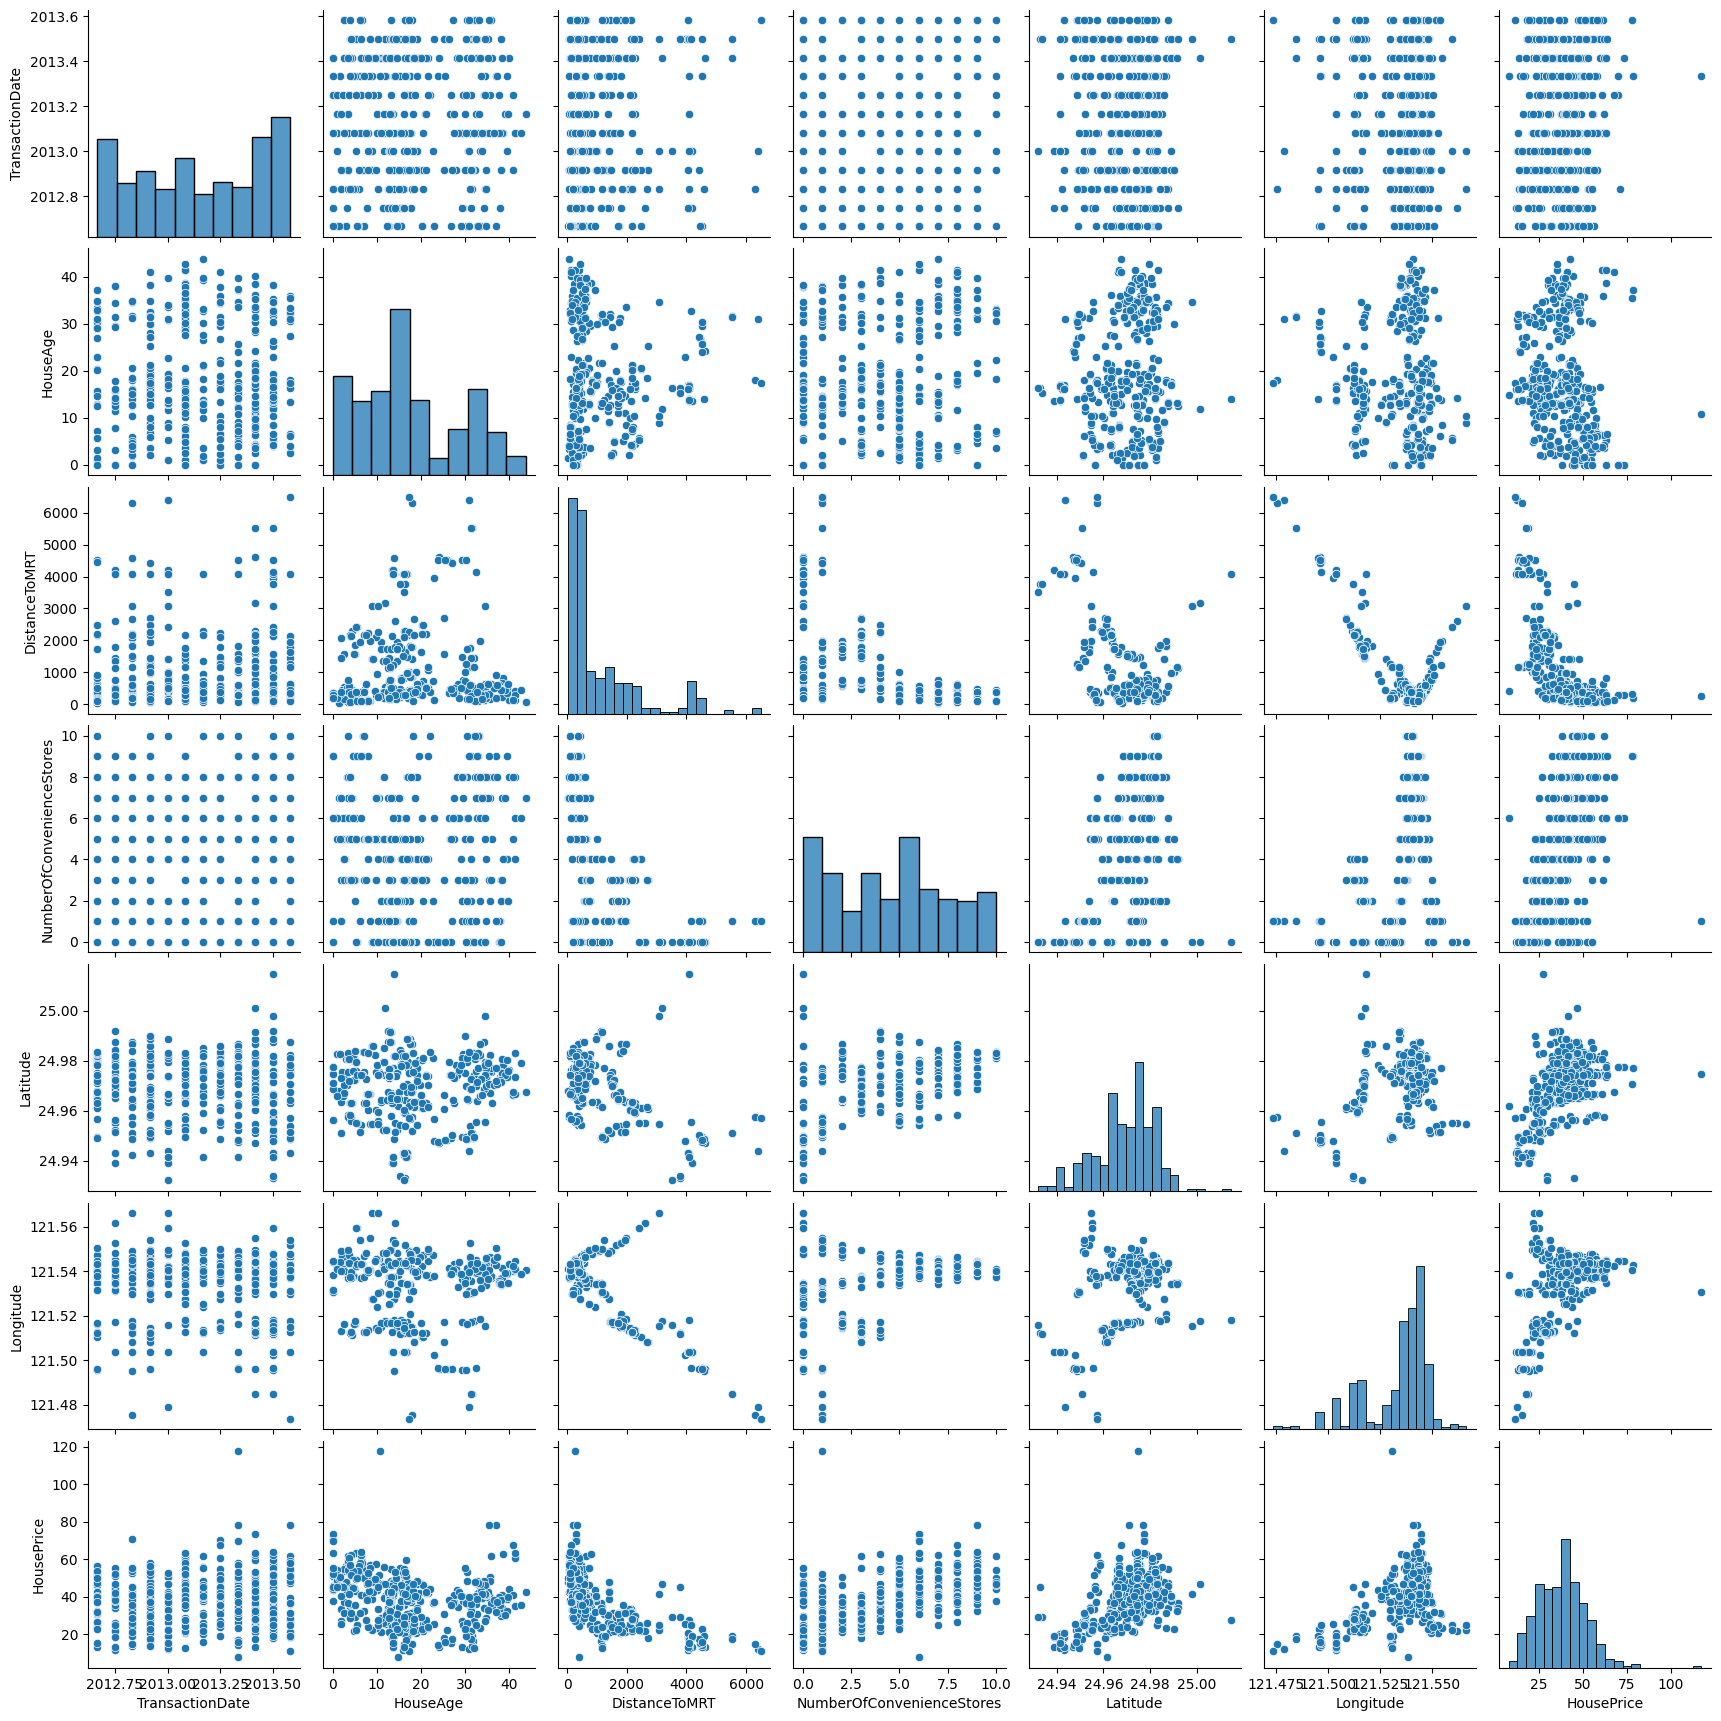

Intercept (β0): -13044.231917160534
Coefficients: [ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]
Mean Squared Error: 53.505619124504506
R-squared Score: 0.6810580555095801


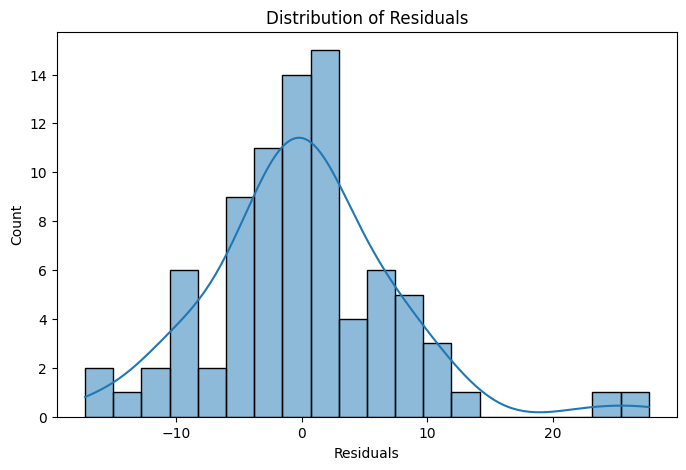


Interpretation of Model Results:
TransactionDate: 5.4407
HouseAge: -0.2708
DistanceToMRT: -0.0048
NumberOfConvenienceStores: 1.0914
Latitude: 229.0431
Longitude: -29.4926


In [ ]:
## Advanced Multiple Linear Regression: Real Estate Price Prediction
"""
### Problem Statement
We aim to predict house prices using real estate data, considering factors like:
- Transaction Date
- House Age
- Distance to MRT station
- Number of Convenience Stores
- Latitude & Longitude

Using **Multiple Linear Regression (MLR)**, we build a predictive model based on these factors.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = "/content/RealEstateData.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Rename columns for readability
df.columns = ["ID", "TransactionDate", "HouseAge", "DistanceToMRT", "NumberOfConvenienceStores", "Latitude", "Longitude", "HousePrice"]
df = df.drop(columns=["ID"])  # Drop ID column as it's not useful

# Step 2: Data Preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nDataset Summary:\n", df.describe())

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

# Step 4: Define Features (X) and Target Variable (y)
X = df[["TransactionDate", "HouseAge", "DistanceToMRT", "NumberOfConvenienceStores", "Latitude", "Longitude"]]
y = df["HousePrice"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Model Parameters
print(f"Intercept (β0): {mlr.intercept_}")
print(f"Coefficients: {mlr.coef_}")

# Step 6: Predictions
y_pred = mlr.predict(X_test)

# Step 7: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}") #MSE measures how far the predicted values are from the actual values by averaging the squared differences between them — lower MSE means better model performance.
print(f"R-squared Score: {r2}") #R2 measures how well the model explains the variability of the target variable, ranging from 0 to 1, where 1 means the model perfectly fits the data.

# Step 8: Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Step 9: Interpretation
print("\nInterpretation of Model Results:")
feature_names = X.columns
for feature, coef in zip(feature_names, mlr.coef_):
    print(f"{feature}: {coef:.4f}")


### **Interpretation of Model Results**
- **Intercept (β0) = -13044.23**
  - This represents the base price of a house when all features are zero. However, since some values (e.g., `TransactionDate`) cannot be zero, the intercept is mainly useful as a reference.

- **Coefficients (Feature Weights)**:
  - **Transaction Date (β1 = 5.4407)** → A positive value indicates that house prices have been increasing over time.
  - **House Age (β2 = -0.2708)** → Older houses tend to have slightly lower prices.
  - **Distance to MRT (β3 = -0.0048)** → The further a house is from an MRT station, the lower the price, but the effect is small.
  - **Number of Convenience Stores (β4 = 1.0914)** → More stores nearby increase house prices.
  - **Latitude (β5 = 229.0431)** → A positive impact suggests that properties at **higher latitudes** (possibly closer to desirable locations) are more expensive.
  - **Longitude (β6 = -29.4926)** → A negative impact means moving eastward slightly decreases property values.

- **Model Fit (R² Score = 0.681)**
  - The model explains **68.1% of the variation** in house prices, which is a **decent fit**.
  - **Mean Squared Error (MSE) = 53.50** → This is the average squared difference between actual and predicted prices. Lower values indicate better performance.

The residuals distribution plot shows the differences between the observed house prices (y_actual) and the predicted house prices (y_pred).

1. What Are Residuals?
- Residual = 𝑦 actual − 𝑦 predicted
- Positive residual → The model underestimated the price.
- Negative residual → The model overestimated the price.

The goal is to have residuals centered around zero with a random, normal distribution, indicating a well-fitted model.

Interpreting Each Coefficient

a. TransactionDate: 5.4407

- Interpretation: For each one-unit increase in the transaction date (e.g., from 2012.917 to 2013.917), the predicted house price increases by 5.44 units. Newer transaction dates likely correlate with higher property values due to factors like inflation, real estate market growth, or improved infrastructure.

b. HouseAge: -0.2708

- Interpretation: For each additional year of house age, the predicted house price decreases by 0.27 units. Older houses tend to depreciate in value due to wear and tear, maintenance costs, and changing buyer preferences favoring newer homes.

c. DistanceToMRT: -0.0048

- Interpretation: For each 1-meter increase in distance to the nearest MRT station, the predicted house price decreases by 0.0048 units. Proximity to public transportation typically increases property value, as convenient access to transit is highly valued in urban real estate markets.

d. NumberOfConvenienceStores: 1.0914

- Interpretation: For each additional convenience store nearby, the predicted house price increases by 1.09 units. More convenience stores increase the neighborhood's attractiveness due to improved amenities, better walkability, and increased urban infrastructure.

e. Latitude: 229.0431
- Interpretation: For each 1-degree increase in latitude, the predicted house price increases by 229.04 units. Higher latitude values in Taipei may correlate with desirable neighborhoods, possibly closer to commercial centers or natural amenities.

f. Longitude: -29.4926
- Interpretation: For each 1-degree increase in longitude, the predicted house price decreases by 29.49 units. This suggests that moving eastward or in the longitude direction may lead to less desirable locations—for example, farther from the city center or important infrastructure.


The model suggests that:

- Newer transactions, newer homes, and greater accessibility (closer to MRT stations and more stores) increase property values.
- Properties at higher latitudes are more valuable, while properties further from MRT stations or moving eastward experience price reductions.

Practical Takeaway:

- Real estate developers might consider building more convenience stores or investing in areas near MRT stations to increase property values.

###To Save as CSV (Results & Predictions)

In [ ]:
df_results = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
df_results.to_csv("/content/house_price_predictions.csv", index=False)


###After running this, you can download the file using:

In [ ]:
from google.colab import files
files.download("/content/house_price_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###To Save a Plot as an Image (PNG)

If you want to save a visualization, such as the residuals plot:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

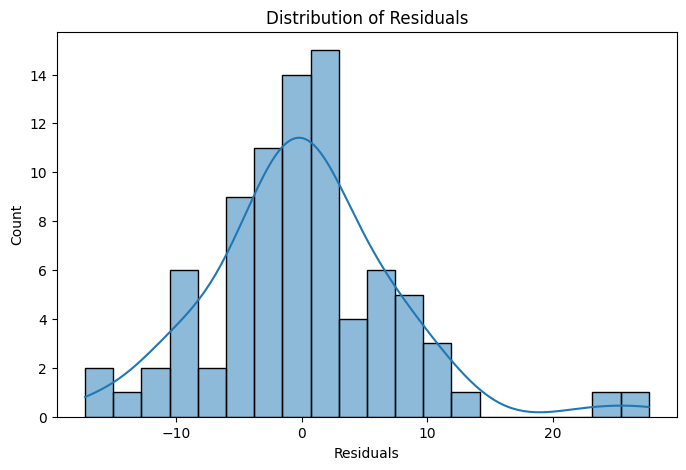

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.savefig("/content/residuals_plot.png")
files.download("/content/residuals_plot.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

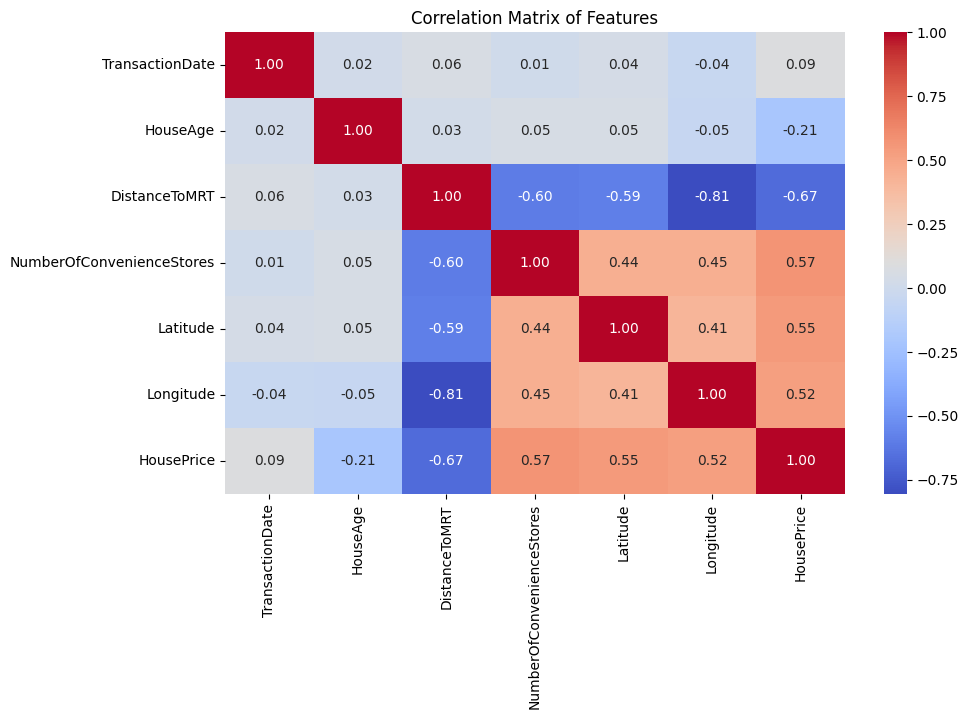

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.savefig("/content/Matrix_plot.png")
files.download("/content/Matrix_plot.png")

Color scheme:

- Dark red → Strong positive correlation.
- Dark blue → Strong negative correlation.
- Lighter shades → Weak or no correlation.

## **Insights & Next Steps**

✅ **What We Learned**
- Houses **closer to MRT stations** and **in areas with more convenience stores** are priced higher.
- **Newer houses** tend to have higher values.
- **Latitude and longitude** play an important role, likely reflecting location desirability.

📌 **Possible Improvements**
- **Feature Engineering**: Try adding **interaction terms** (e.g., combining distance to MRT & convenience stores).
- **Non-Linear Models**: Consider **Random Forest or Gradient Boosting** for better predictions.
- **Data Normalization**: Since distance varies widely, normalizing could improve results.

# ---- LOGISTIC REGRESSION ---- #

### Concept of Logistic Regression

**Logistic Regression** is a statistical model used for binary classification problems. Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and assigns an outcome to one of two possible categories.

The logistic function (or sigmoid function) is given by:

    P(Y=1 | X) = 1 / (1 + e^(- (β0 + β1X1 + β2X2 + ... + βnXn)))

Where:
- **P(Y=1 | X)** represents the probability that the outcome belongs to class **1**.
- **β0** is the intercept, and **β1, β2, ..., βn** are the coefficients associated with the predictor variables.
- **e** is the natural logarithm base (Euler's number or Napier's constant).

#### **Why Use Logistic Regression?**
- It is simple, interpretable, and efficient for **binary classification** problems.
- It outputs probabilities, making it useful in decision-making scenarios.
- Works well when the relationship between independent variables and the log-odds of the dependent variable is linear.

## Real-World Example: Predicting High vs. Low House Prices


### **Problem Statement**
We modify the real estate dataset to create a **binary classification problem**:
- We classify houses into **"High Price" (1)** and **"Low Price" (0)** based on whether their price is above the median price.
- We use features such as transaction date, house age, distance to MRT station, number of convenience stores, latitude, and longitude.




Accuracy: 0.8193
Confusion Matrix:
 [[37 11]
 [ 4 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.74      0.89      0.81        35

    accuracy                           0.82        83
   macro avg       0.82      0.83      0.82        83
weighted avg       0.83      0.82      0.82        83



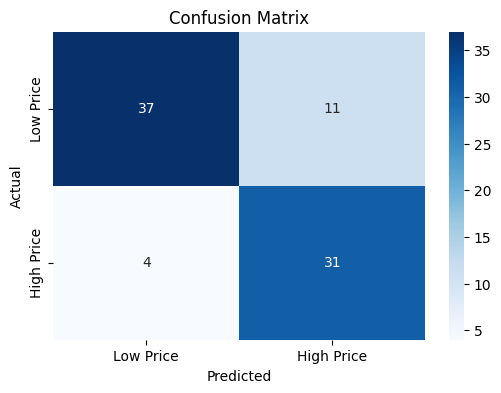

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = "/content/RealEstateData.csv"
df = pd.read_csv(file_path)

# Rename columns for readability
df.columns = ["ID", "TransactionDate", "HouseAge", "DistanceToMRT", "NumberOfConvenienceStores", "Latitude", "Longitude", "HousePrice"]
df = df.drop(columns=["ID"])  # Drop ID column as it's not useful

# Convert HousePrice into a binary category (above/below median price)
median_price = df["HousePrice"].median()
df["HighPrice"] = (df["HousePrice"] > median_price).astype(int)

# Step 3: Define Features (X) and Target Variable (y)
X = df[["TransactionDate", "HouseAge", "DistanceToMRT", "NumberOfConvenienceStores", "Latitude", "Longitude"]]
y = df["HighPrice"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Price", "High Price"], yticklabels=["Low Price", "High Price"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 📊 Macro Average vs. Weighted Average in Classification Metrics

### 🔍 **1. Macro Average (Unweighted Mean)**

**Definition:**
- **Macro average** computes the **unweighted mean** of a classification metric (**precision, recall, or F1-score**) across all classes.
- **Each class is given equal weight**, regardless of its number of samples.

📏 **Formula:**




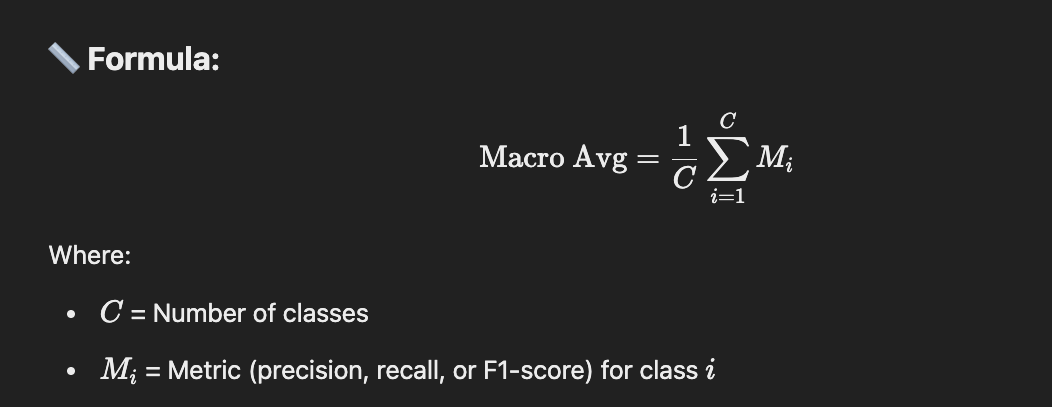



📌 **When to Use?**
- **Use Macro Avg when all classes are equally important**, even if the dataset is **imbalanced**.
- **Good for balanced datasets**, but can be misleading if some classes have very few samples.



### 🔍 **2. Weighted Average (Class Proportion-Based Mean)**

**Definition:**
- **Weighted average** computes the mean metric (**precision, recall, or F1-score**) while **accounting for class imbalances** by weighting each class by its number of samples.
- **Larger classes contribute more to the final metric**.

📏 **Formula:**

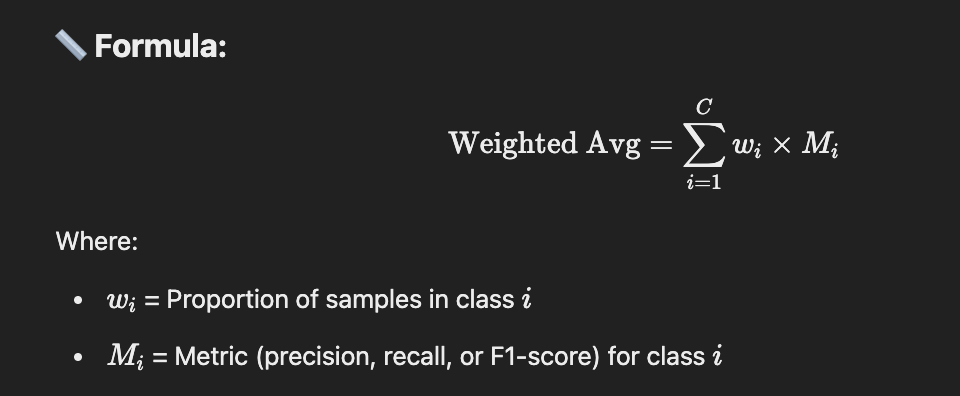

📌 **When to Use?**
- **Use Weighted Avg when the dataset is imbalanced**, ensuring that large classes do not dominate the evaluation.
- **More reliable for real-world datasets**, where class distributions are typically unequal.



In [18]:
from sklearn.metrics import classification_report

# Example actual and predicted values
y_true = [0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Extract macro and weighted averages
macro_f1 = report["macro avg"]["f1-score"]
weighted_f1 = report["weighted avg"]["f1-score"]

print(f"Macro Avg F1-Score: {macro_f1:.4f}")
print(f"Weighted Avg F1-Score: {weighted_f1:.4f}")

Macro Avg F1-Score: 0.6970
Weighted Avg F1-Score: 0.6970





### 🎯 **Final Summary**

| Metric | Formula | When to Use? |
|---------|---------------------------------------------------|--------------------------------|
| **Macro Avg** | Equal weight to each class (unweighted mean) | Use when **all classes matter equally**, even if imbalanced. |
| **Weighted Avg** | Weighted by class frequency | Use when **class sizes are imbalanced** to prevent small classes from distorting results. |

📌 **Key Takeaways:**
- **Macro Avg** treats all classes **equally**, even if some have very few samples.
- **Weighted Avg** adjusts for **imbalanced datasets**, making it **better for real-world applications**.
- **F1-score, precision, and recall** can all be averaged using **macro** or **weighted** methods depending on the dataset structure.

✅ **Use Macro Avg for balanced datasets.**

✅ **Use Weighted Avg for imbalanced datasets.**

## Interpretation of Results

### **Confusion Matrix Breakdown**
The confusion matrix output:
```
[[37 11]
 [ 4 31]]
```
- **True Positives (TP) = 31** → Correctly predicted high-price houses.
- **True Negatives (TN) = 37** → Correctly predicted low-price houses.
- **False Positives (FP) = 11** → Incorrectly predicted high-price when it was actually low-price.
- **False Negatives (FN) = 4** → Incorrectly predicted low-price when it was actually high-price.

### **Key Metrics:**
- **Accuracy**: Measures the proportion of correctly classified houses (**81.93%** accuracy).
- **Precision & Recall**:
  - **Precision for High Price**: 74% (out of all predicted high-price houses, 74% were correct). TP/(TP+FP). 74% of the houses that were predicted as "High Price" were correctly identified. The remaining 26% were false positives (incorrectly predicted as high price).
  - **Recall for High Price**: 89% (out of all actual high-price houses, 89% were correctly identified). TP/(TP+FN). 89% of the houses that actually are "High Price" were correctly identified. The remaining 11% were false negatives (missed high-price homes).

### **Observations:**
- If accuracy is high, our model performs well in distinguishing between high and low-priced houses.
- If precision is low, we may have too many false positives (predicting "High Price" when it’s actually low).
- If recall is low, we may be missing a lot of actual high-priced houses.




The F1 Score is the harmonic mean of precision and recall, providing a single metric to balance both measures.

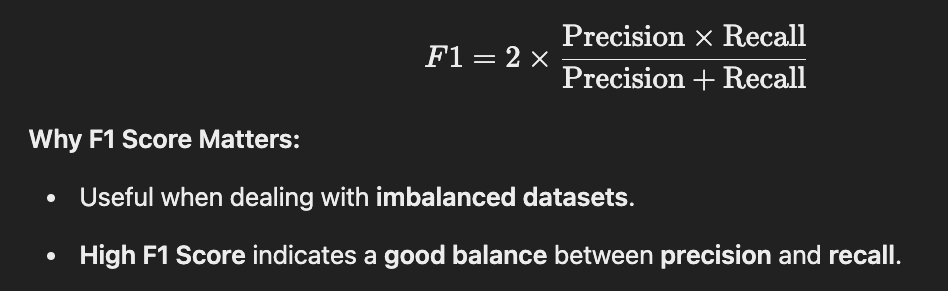

In [ ]:
from sklearn.metrics import f1_score

# Example actual and predicted values (from confusion matrix above)
y_true = [0]*37 + [1]*4 + [0]*11 + [1]*31  # Actual labels based on the confusion matrix
y_pred = [0]*37 + [0]*4 + [1]*11 + [1]*31  # Predicted labels based on the confusion matrix

# Calculate F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.8052


- High F1 Score → Model has a good balance between precision and recall.
- Low F1 Score → Model may either have low precision (too many false positives) or low recall (too many false negatives).

### **Next Steps for Improvement:**
- Try different threshold values for classification.
- Use **feature scaling** (e.g., standardization) for better results.
- Apply **non-linear models** like Decision Trees or Random Forest for better accuracy.

In [ ]:
# Save results for download
results_df = pd.DataFrame({"Actual Price Category": y_test, "Predicted Price Category": y_pred})
results_df.to_csv("/content/logistic_regression_results.csv", index=False)

from google.colab import files
files.download("/content/logistic_regression_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ROC Curve Analysis for Logistic Regression

### **1. Understanding the ROC Curve**
The **Receiver Operating Characteristic (ROC) Curve** is a graphical representation that illustrates the diagnostic ability of a binary classification model. It plots:
- **True Positive Rate (TPR) (Sensitivity/Recall)**: Measures how well the model identifies actual positives.
- **False Positive Rate (FPR)**: Measures how often the model incorrectly classifies negatives as positives.

The **Area Under the Curve (AUC)** summarizes the performance:
- **AUC = 1.0**: Perfect classifier.
- **AUC = 0.5**: No discrimination (random guessing).
- **AUC > 0.8**: Good classification ability.

The **closer the ROC curve is to the top-left corner**, the better the model performs.

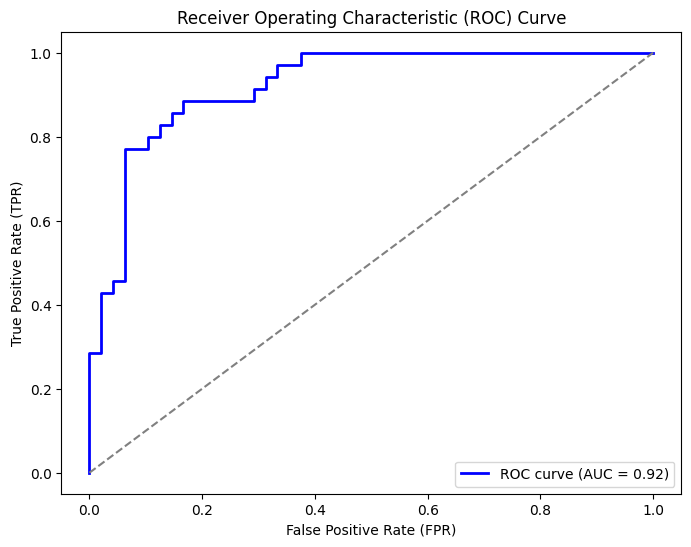

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line for random model
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Interpretation of the ROC Curve
✅ **AUC Score Interpretation:**
- Our model achieved an **AUC of 0.92**, meaning it effectively distinguishes between high and low-priced houses.
- A higher AUC (closer to 1) suggests **strong classification performance**.

📌 **What This Means for Our Model:**
- With **AUC = 0.92**, our model has excellent predictive ability, making it a highly reliable classifier.
- The model successfully differentiates between high and low-price categories with minimal misclassification.

🚀 **Next Steps for Model Improvement:**
- Consider **feature scaling** to improve decision boundaries.
- Experiment with different **classification thresholds** to optimize precision-recall balance.
- Try **ensemble methods** like Random Forest or XGBoost to further refine performance.

## 📊 Measuring Performance in Classification: Precision, Recall, F1 Score, TPR, FPR, and Specificity


### 1. Precision (Positive Predictive Value)

**Definition:**
Precision measures how many of the predicted positive cases are actually positive.

**Formula:**
    Precision = TP / (TP + FP)

**Interpretation:**
- High Precision → Few False Positives.
- Low Precision → Many False Positives.


### ✅ Python Code for Precision
```python
from sklearn.metrics import precision_score

# Actual vs Predicted Labels
y_true = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# Calculate Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
```

---


### 2. Recall (True Positive Rate / Sensitivity)

**Definition:**
Recall measures how many of the actual positive cases were correctly identified.

**Formula:**
    Recall = TP / (TP + FN)

**Interpretation:**
- High Recall → Few False Negatives.
- Low Recall → Many False Negatives.


### ✅ Python Code for Recall
```python
from sklearn.metrics import recall_score

# Calculate Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")
```

---


### 3. F1 Score (Harmonic Mean of Precision and Recall)

**Definition:**
The F1 Score balances Precision and Recall.

**Formula:**
    F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

**Interpretation:**
- High F1 → Good balance between Precision and Recall.
- Low F1 → Imbalance or poor model performance.


### ✅ Python Code for F1 Score
```python
from sklearn.metrics import f1_score

# Calculate F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")
```

---


### 4. True Positive Rate (TPR) - Sensitivity/Recall

**Definition:**
TPR is identical to Recall.

**Formula:**
    TPR = TP / (TP + FN)

**Interpretation:**
- TPR = Probability of detecting positive samples.
- High TPR → Few False Negatives.


### ✅ Python Code for TPR
```python
# TPR is the same as Recall
tpr = recall_score(y_true, y_pred)
print(f"True Positive Rate (TPR): {tpr:.2f}")
```

---


### 5. False Positive Rate (FPR)

**Definition:**
FPR measures the proportion of negative cases incorrectly classified as positive.

**Formula:**
    FPR = FP / (FP + TN)

**Interpretation:**
- High FPR → Many false alarms.
- Low FPR → Model correctly rejects negatives.


### ✅ Python Code for FPR
```python
from sklearn.metrics import confusion_matrix

# Calculate FPR manually
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
FPR = fp / (fp + tn)
print(f"False Positive Rate (FPR): {FPR:.2f}")
```

---


### 6. Specificity (True Negative Rate - TNR)

**Definition:**
Specificity measures how many negative cases were correctly identified.

**Formula:**
    Specificity = TN / (TN + FP)

**Relation to FPR:**
    Specificity = 1 - FPR

**Interpretation:**
- High Specificity → Few False Positives.
- Low Specificity → Many False Positives.


### ✅ Python Code for Specificity
```python
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"Specificity (TNR): {specificity:.2f}")
```

---

## **Summary**

| **Metric**    | **Formula**                 | **What It Measures**                                   |
|----------------|---------------------------|--------------------------------------------------------|
| **Precision** | TP / (TP + FP)              | Accuracy of positive predictions                        |
| **Recall/TPR**| TP / (TP + FN)              | Ability to detect actual positives                      |
| **F1 Score**  | 2 × (P×R)/(P+R)             | Balance of precision and recall                         |
| **FPR**       | FP / (FP + TN)              | False alarm rate for negatives                         |
| **Specificity**| TN / (TN + FP)             | Ability to detect actual negatives                      |

**Tip:**
- Optimize **precision** when **false positives are costly** (e.g., spam detection).  
- Optimize **recall** when **false negatives are costly** (e.g., cancer detection).


# ---- Bias-Variance Tradeoff ---- #

## **1. Understanding Bias-Variance Tradeoff**
The **Bias-Variance Tradeoff** is a fundamental concept in machine learning that describes the balance between two sources of error:

1. **Bias (Underfitting):**
   - Error due to overly simplistic models that fail to capture the underlying patterns in the data.
   - Example: Using a linear regression model on a dataset with a non-linear relationship.
   
2. **Variance (Overfitting):**
   - Error due to overly complex models that capture noise instead of true patterns.
   - Example: Using a high-degree polynomial regression model that fits training data perfectly but performs poorly on new data.

**Key Objective:**
- Find a model that minimizes **total error** (bias + variance) for optimal generalization.

**Polynomial Regression** is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.


Polynomial regression is still a type of linear regression because it is linear in terms of its parameters (coefficients), even though it models non-linear relationships between the features and the target variable.

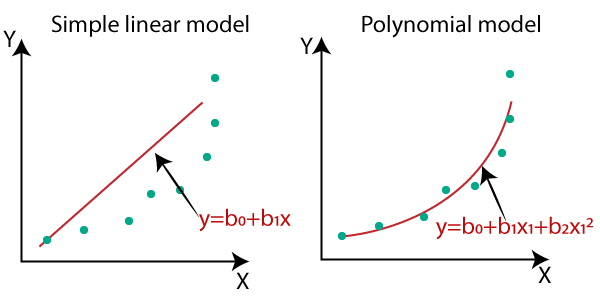

Ref: https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

## **2. Visualizing the Bias-Variance Tradeoff**

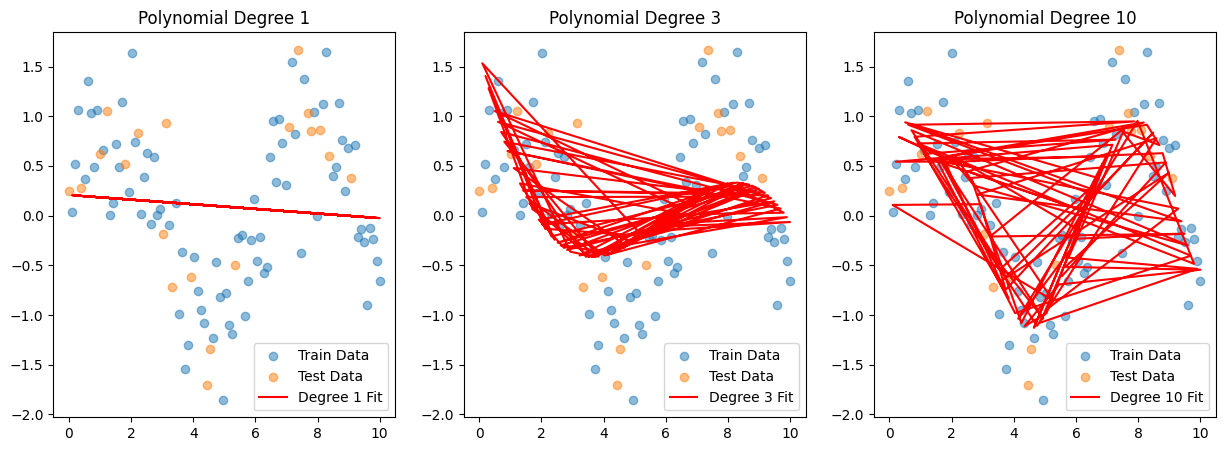

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with different complexities
degrees = [1, 3, 10]
plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees):
    plt.subplot(1, 3, i + 1)
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Plot Data
    plt.scatter(X_train, y_train, label='Train Data', alpha=0.5)
    plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
    plt.plot(X_train, y_pred_train, color='red', label=f'Degree {d} Fit')
    plt.title(f'Polynomial Degree {d}')
    plt.legend()

plt.show()



## **3. Model Performance & Error Analysis**


### **Interpretation of Results:**
- **Degree 1 (High Bias - Underfitting):**
  - The model is too simple to capture data complexity, leading to **high training and test errors**.
- **Degree 3 (Balanced Tradeoff):**
  - This model achieves a good balance between bias and variance, generalizing well.
- **Degree 10 (High Variance - Overfitting):**
  - The model fits training data **too closely**, leading to **low training error but high test error**.

### **Key Takeaways:**
- **Low Bias & High Variance → Overfitting**
- **High Bias & Low Variance → Underfitting**
- **Optimal Tradeoff**: The best model minimizes both errors for improved generalization.

🚀 **Next Steps:**
- Try using **regularization techniques** (L1/L2 penalties) to reduce overfitting.
- Use **cross-validation** to tune model complexity.
- Experiment with different algorithms to find the best bias-variance balance.

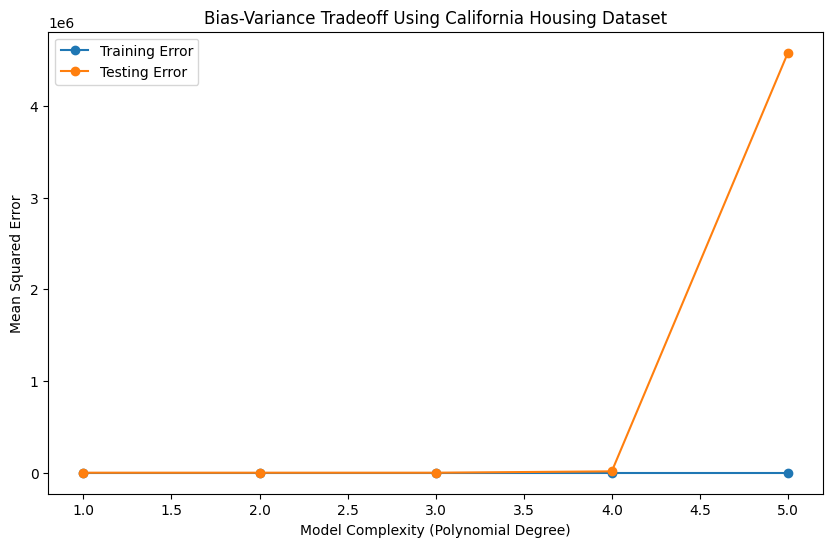

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MEDV')  # Median house value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to calculate errors for different polynomial degrees
def calculate_errors(degrees):
    train_errors = []
    test_errors = []
    for d in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train the model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and calculate errors
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    return train_errors, test_errors

# Define the degrees of polynomial to test
degrees = [1, 2, 3, 4, 5]

# Calculate errors
train_errors, test_errors = calculate_errors(degrees)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff Using California Housing Dataset')
plt.legend()
plt.show()


Bias-Variance Tradeoff plot for the California Housing dataset shows the relationship between model complexity (polynomial degree) and mean squared error for both training and testing datasets.

**Interpretation of the Graph:**

1. Low Complexity (Degree 1, 2, 3)

- Training and testing errors are low and stable, meaning the model is performing well.
- This suggests that a polynomial degree around 2 or 3 might be optimal.

2. Moderate Complexity (Degree 4)

- Slight increase in testing error, while training error remains low.
- The model may be starting to overfit.

3. High Complexity (Degree 5 - Overfitting!)
- Huge increase in testing error while training error stays low.
- This suggests that the model is memorizing training data but generalizing poorly to unseen data.
- This is a clear sign of overfitting.

**Key Takeaways:**

✅ Underfitting (High Bias): Occurs at low polynomial degrees (Degree 1), where the model is too simple.

✅ Balanced Tradeoff: Occurs at Degree 2 or 3, where both training and testing errors are minimized.

✅ Overfitting (High Variance): Happens at Degree 5, where testing error spikes while training error remains low.

**📌 Best Practice:**

- Stick to degrees around 2-3 for optimal generalization.
- Regularization techniques (L1, L2 penalties) can help prevent overfitting.
- Try alternative models (e.g., Random Forest, XGBoost) for better performance.


In [ ]:
# Displaying MSE values for Low Complexity Models
degrees = [1, 2, 3]
for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    print(f"Degree {d} Model - Test MSE: {mse:.4f}")

Degree 1 Model - Test MSE: 0.5559
Degree 2 Model - Test MSE: 0.4643
Degree 3 Model - Test MSE: 25.4071


In [ ]:
# Checking performance of Degree 4 model
model = make_pipeline(PolynomialFeatures(4), LinearRegression())
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Degree 4 Model - Test MSE: {mse:.4f}")

Degree 4 Model - Test MSE: 15039.7005


In [ ]:
# Checking performance of Degree 5 model
model = make_pipeline(PolynomialFeatures(5), LinearRegression())
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Degree 5 Model - Test MSE: {mse:.4f}")

Degree 5 Model - Test MSE: 4579063.0762


In [ ]:
degrees = [1, 2, 3, 4, 5]  # Ensure all elements match the number of errors calculated

In [ ]:
print(f"Degrees: {degrees}")
print(f"Train Errors: {train_errors}")
print(f"Test Errors: {test_errors}")


Degrees: [1, 2, 3, 4, 5]
Train Errors: [0.5179331255246699, 0.4207266151573555, 0.34202597702168214, 0.2816286309953113, 0.23657619347706987]
Test Errors: [0.5558915986952436, 0.4643015238301214, 25.407137116617477, 15039.700507173686, 4579063.076151878]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

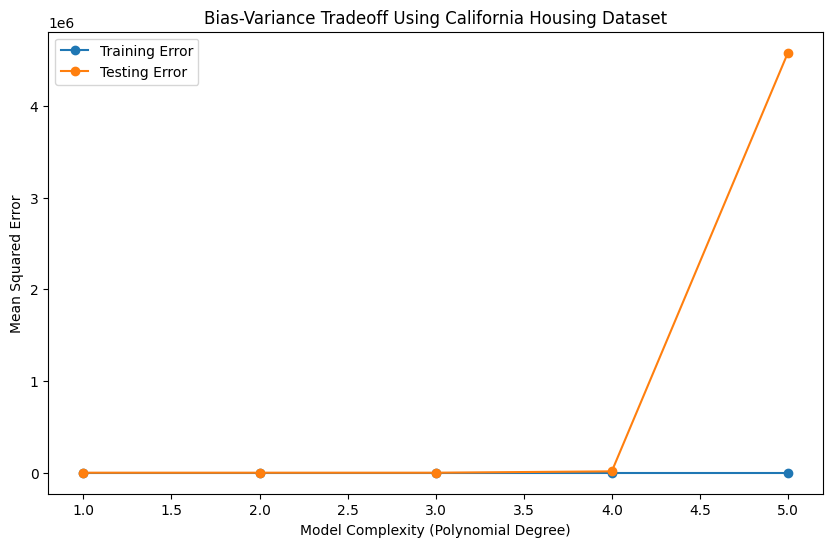

In [ ]:
# Save the final Bias-Variance plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff Using California Housing Dataset')
plt.legend()
plt.savefig("/content/bias_variance_tradeoff.png")

# Download the plot
from google.colab import files
files.download("/content/bias_variance_tradeoff.png")


### **Logistic Regression is a Linear Model for Classification?**

- Yes, **logistic regression is linear** in how it models the relationship between the independent variables (X) and the log-odds of the dependent variable (Y).
- It applies a **linear function** to the input features but transforms the output using a **sigmoid (logistic) function**.

#### **Logistic Regression Formula:**
```
P(Y=1 | X) = 1 / (1 + e^-(β0 + β1X1 + β2X2 + ... + βnXn))
```
- The **log-odds** (logit function) is a linear combination of the inputs:
```
log(P(Y=1) / (1 - P(Y=1))) = β0 + β1X1 + ... + βnXn
```
- This means **logistic regression is linear in terms of the log-odds**.

### **Logistic Regression vs. Linear Regression**

| Feature               | **Linear Regression**                         | **Logistic Regression**                     |
|-----------------------|--------------------------------|--------------------------------|
| **Output Type**       | Continuous (any real number)  | Probability (between 0 and 1) |
| **Equation Type**     | `Y = β0 + β1X1 + ...` | `P(Y=1) = 1 / (1 + e^-(β0 + β1X1 + ...))` |
| **Used For**         | Regression (predicting numbers) | Classification (predicting classes) |
| **Best Fit Line**    | Straight Line                 | S-shaped Sigmoid Curve |
| **Error Metric**     | Mean Squared Error (MSE)      | Log Loss (Cross-Entropy) |

- **Linear Regression** models a direct relationship between input and output.
- **Logistic Regression** models the probability of an event occurring (classification) but uses a **linear decision boundary in feature space**.


### **Is Logistic Regression Truly "Linear"?**

- **Yes**, because the decision boundary in logistic regression is a **linear function** of the inputs.
- **No**, because it applies a **non-linear transformation (sigmoid function)** to convert outputs into probabilities.

For example:
- If we have **two features (X1, X2)**, logistic regression finds a **linear boundary** that separates classes:
  ```
  β0 + β1X1 + β2X2 = 0
  ```
  - This forms a **straight line in 2D** or a **hyperplane in higher dimensions**.
  - This is why logistic regression is **linear in its decision boundary**.

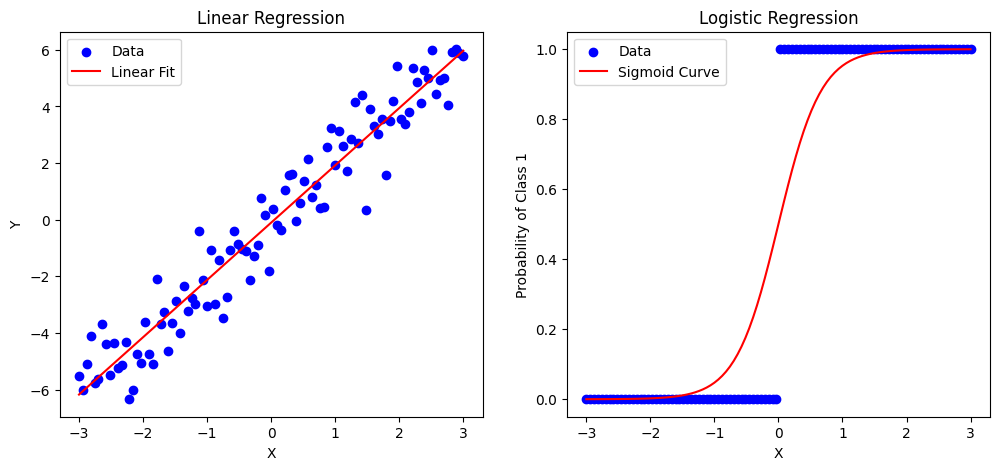

In [ ]:
# Visualizing the Difference Between Linear and Logistic Regression**
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_linear = 2 * X + np.random.normal(0, 1, X.shape)  # Linear regression target
y_logistic = (X > 0).astype(int).ravel()  # Logistic regression target (binary)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X, y_linear)
y_linear_pred = lin_reg.predict(X)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X, y_logistic)
y_logistic_prob = log_reg.predict_proba(X)[:, 1]  # Probabilities

# Plot the results
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X, y_linear, color='blue', label='Data')
plt.plot(X, y_linear_pred, color='red', label='Linear Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()

# Logistic Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X, y_logistic, color='blue', label='Data')
plt.plot(X, y_logistic_prob, color='red', label='Sigmoid Curve')
plt.xlabel('X')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression')
plt.legend()

plt.show()

## **Key Takeaways**

✅ Logistic Regression is linear in how it models the log-odds but not in its output.

✅ Linear Regression is for continuous prediction, while Logistic Regression is for classification.

✅ Logistic Regression has a linear decision boundary but a non-linear sigmoid transformation.

✅ Understanding this difference helps in choosing the right model for the right problem.



Why Log-Odds?

Logistic Regression uses log-odds because the model’s linear equation operates in terms of log-odds rather than probabilities.
Log-odds range from −∞ to ∞, making it suitable for linear modeling, while probabilities are constrained between 0 and 1.

Intuition
- Log-odds > 0: Probability greater than 0.5 (event is more likely to happen).
- Log-odds = 0: Probability exactly 0.5.
- Log-odds < 0: Probability less than 0.5 (event is less likely to happen).


## Why Are Linear and Logistic Regression Supervised Learning Algorithms?

### **1. Supervised Learning Definition**

✅ **Supervised learning** is a type of machine learning where the model learns from **labeled data**, meaning it has both **input features (X)** and **corresponding output labels (Y)** to learn from.

- The model's goal is to **map inputs (X) to correct outputs (Y)** by learning from past examples.
- The dataset contains **ground truth labels**, which guide the learning process.



## **2. Linear Regression: Supervised Learning**


✅ **Linear Regression is supervised because:**
- It is trained on **labeled data** where the output (Y) is a continuous value.
- The model learns a function `Y = β0 + β1X1 + ... + βnXn` to predict numerical values.
- Example: **Predicting house prices based on size and location.**


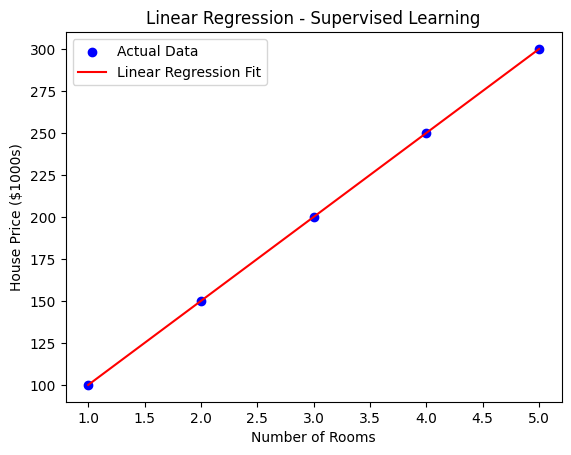

In [ ]:
# Example of Linear Regression on Labeled Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset (labeled data)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature: Number of rooms
y = np.array([100, 150, 200, 250, 300])  # Target: House price

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the result
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression Fit')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price ($1000s)')
plt.title('Linear Regression - Supervised Learning')
plt.legend()
plt.show()



## **3. Logistic Regression: Supervised Learning**


✅ **Logistic Regression is supervised because:**
- It is trained on **labeled data** where the output (Y) is categorical (binary or multi-class).
- The model learns to **predict probabilities** and classify data into categories.
- Example: **Spam detection (Spam = 1, Not Spam = 0).**

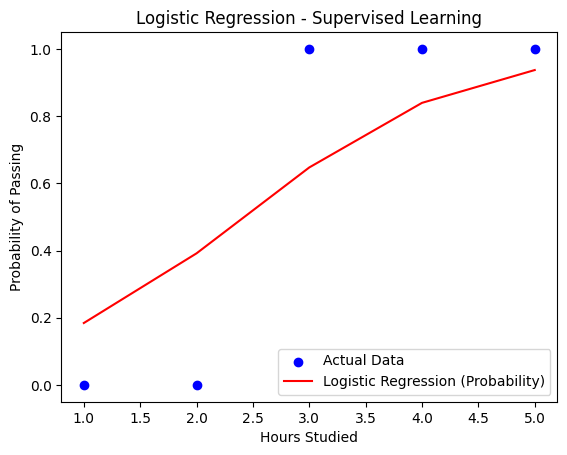

In [ ]:
# Example of Logistic Regression on Labeled Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample binary classification dataset
X = np.array([[1], [2], [3], [4], [5]])  # Number of hours studied
y = np.array([0, 0, 1, 1, 1])  # Passed Exam (1) or Not (0)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_prob = log_reg.predict_proba(X)[:, 1]  # Get probabilities for class 1

# Plot sigmoid curve
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_prob, color='red', label='Logistic Regression (Probability)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - Supervised Learning')
plt.legend()
plt.show()


## **4. Why Are They NOT Unsupervised Learning?**


❌ **Unsupervised learning** is when the model is trained on **unlabeled data** and tries to find hidden patterns.
- **Linear and Logistic Regression require labeled data (Y values) to train.**
- **Unsupervised learning (like clustering) does not have labeled Y values**—it only finds patterns in input features.

Examples of unsupervised learning algorithms:
- **K-Means Clustering**
- **Principal Component Analysis (PCA)**
- **Hierarchical Clustering**

## **5. Key Takeaways**


✅ Both Linear and Logistic Regression are supervised learning algorithms** because they learn from labeled data.

✅ Linear Regression predicts continuous values, while Logistic Regression classifies data into categories.

✅ Supervised learning models require labeled training data (Y values) to learn and make predictions.

❌ Unsupervised learning does not use labeled outputs and instead finds patterns.

## 🔍 Quick Rule of Thumb: Linear vs Non-Linear Models

| **Model Type**            | **Linear in Parameters?** | **Relationship with Input?** | **Classification**    |
|---------------------------|---------------------------|------------------------------|------------------------|
| **Simple Linear Regression**  | ✅ Yes  | Linear | **Linear Regression** |
| **Polynomial Regression**     | ✅ Yes  | Non-linear | **Linear Regression** (in parameters) |
| **Logistic Regression**       | ✅ Yes  | Non-linear (Sigmoid) | **Linear Model** (for log-odds) |
| **Exponential Regression**    | ❌ No   | Non-linear | **Non-Linear Regression** |

**Key Insights:**
- **Linear Regression** models are **linear in the parameters** (coefficients) but can model **non-linear relationships** (e.g., polynomial regression).
- **Non-linear Regression** models are **non-linear in parameters**, which makes them inherently more complex.
- **Logistic Regression** is considered **linear** because it's linear in terms of **log-odds**, despite its **sigmoid activation**.

📖 **Reminder for Students:**
- Polynomial Regression **transforms input features** but still fits a **linear model**.
- Logistic Regression fits a **linear decision boundary** in the feature space.
- Exponential Regression involves **non-linear coefficients**, making it **genuinely non-linear**.

## 📖 Questions: Linear & Logistic Regression, Bias-Variance Tradeoff


### Logistic Regression Probability Interpretation


**Question:**
Write Python code to fit a logistic regression model and compute the predicted probabilities.

**Answer:**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Predictions
probs = model.predict_proba(X)

# Display coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Interpretation:
for i, coef in enumerate(model.coef_[0]):
    print(f"Feature {i+1} → Log-odds change per unit: {coef:.3f}")

Coefficients: [[3.72114562 2.64596508]]
Intercept: [-3.43484665]
Feature 1 → Log-odds change per unit: 3.721
Feature 2 → Log-odds change per unit: 2.646


### Bias-Variance Tradeoff


**Question:**
Explain the Bias-Variance Tradeoff mathematically. How does model complexity affect training and testing error?

**Answer:**
Expected Prediction Error:
  E[(ŷ - y)²] = Bias² + Variance + Irreducible Error


Where:

- Bias: Error from erroneous assumptions; high bias leads to underfitting.
- Variance: Error from model sensitivity to training data; high variance leads to overfitting.
- Irreducible Error: Noise inherent in the data.

**Insights:**
- Increase complexity → Bias ↓, Variance ↑
- Decrease complexity → Bias ↑, Variance ↓



The goal is to find the optimal complexity that minimizes both bias and variance.




### Model Selection


**Question:**
A bank wants to predict loan defaults. Would you use linear or logistic regression?

**Answer:**

Logistic Regression is the appropriate model because:

- Target Variable: Loan default is a binary outcome (default vs. no default).
- Interpretability: Logistic regression coefficients are easily interpretable (e.g., odds of default increase with higher debt-to-income ratio).
- Probability Outputs: The model provides probabilities, which can be used for risk thresholds in loan approvals.

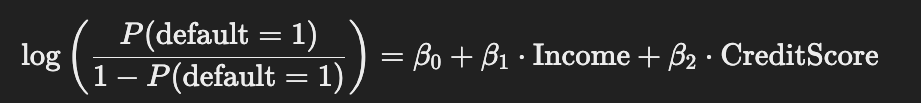

### **Import File to colab**

In [19]:
from google.colab import files

# Upload files
uploaded = files.upload()

# Uploaded files are stored in the current Colab environment
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving RealEstateData.csv to RealEstateData (1).csv
Uploaded file: RealEstateData (1).csv


In [20]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Source file path in Google Drive
source_path = '/content/drive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/RealEstateData.csv'

# Destination path in Colab's content directory
destination_path = '/content/RealEstateData.csv'

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied to: {destination_path}")

# Verify the file
import pandas as pd
df = pd.read_csv(destination_path)
print(df.head())


Mounted at /content/drive
File copied to: /content/RealEstateData.csv
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     